<a href="https://colab.research.google.com/github/mansiraturi/FakeNewsDetection/blob/main/FakeNewsPreprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import re
import string
import dask.dataframe as dd
from dask.multiprocessing import get
from nltk.stem import WordNetLemmatizer


In [ ]:
import matplotlib.pyplot as plt

# Preprocessing Data
import nltk
from nltk.tokenize import word_tokenize


#converting to vectors
from gensim.models import Word2Vec

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score

# model Validation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
print(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
stopWords = stopwords.words('english')
stopWords.extend(['use', 're', 'edu', 'from', 'also'])

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
fake=dd.read_csv("/content/drive/MyDrive/Fake.csv")
true=dd.read_csv("/content/drive/MyDrive/True.csv")
fake.head(10)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017"
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017"
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017"
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017"
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017"


In [ ]:
true.head(5)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [ ]:
true.isnull().sum()

Dask Series Structure:
npartitions=1
date     int64
title      ...
dtype: int64
Dask Name: dataframe-sum-agg, 4 graph layers

In [ ]:
true.columns

Index(['title', 'text', 'subject', 'date'], dtype='object')

In [ ]:
fake["txt"] = fake["title"]+ ' ' +fake["text"]
fake.head()

,title,text,subject,date,txt
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",Donald Trump Sends Out Embarrassing New Year’...
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",Drunk Bragging Trump Staffer Started Russian ...
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",Sheriff David Clarke Becomes An Internet Joke...
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",Trump Is So Obsessed He Even Has Obama’s Name...
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",Pope Francis Just Called Out Donald Trump Dur...


In [ ]:
true["txt"] = true["title"]+ ' '+ true["text"]
true.head()

,title,text,subject,date,txt
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017","As U.S. budget fight looms, Republicans flip t..."
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",U.S. military to accept transgender recruits o...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",Senior U.S. Republican senator: 'Let Mr. Muell...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",FBI Russia probe helped by Australian diplomat...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",Trump wants Postal Service to charge 'much mor...


In [ ]:
fake["class"]=0
true["class"]=1

In [ ]:
num_rows, num_columns = fake.compute().shape
print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

Number of rows: 23481
Number of columns: 6


In [ ]:
true.compute().shape

(21417, 6)

In [ ]:
fake_test = fake.tail(30)
fake = fake.loc[~fake.index.isin(range(23450, 23480))]

true_test = true.tail(30)
true = true.loc[~true.index.isin(range(21386, 21416))]

In [ ]:
news_df = dd.concat([true, fake], ignore_index=True)
news_df.head()

,title,text,subject,date,txt,class
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017","As U.S. budget fight looms, Republicans flip t...",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",U.S. military to accept transgender recruits o...,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",Senior U.S. Republican senator: 'Let Mr. Muell...,1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",FBI Russia probe helped by Australian diplomat...,1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",Trump wants Postal Service to charge 'much mor...,1


In [ ]:
# news_df['txt'] = news_df['txt'].astype(str)

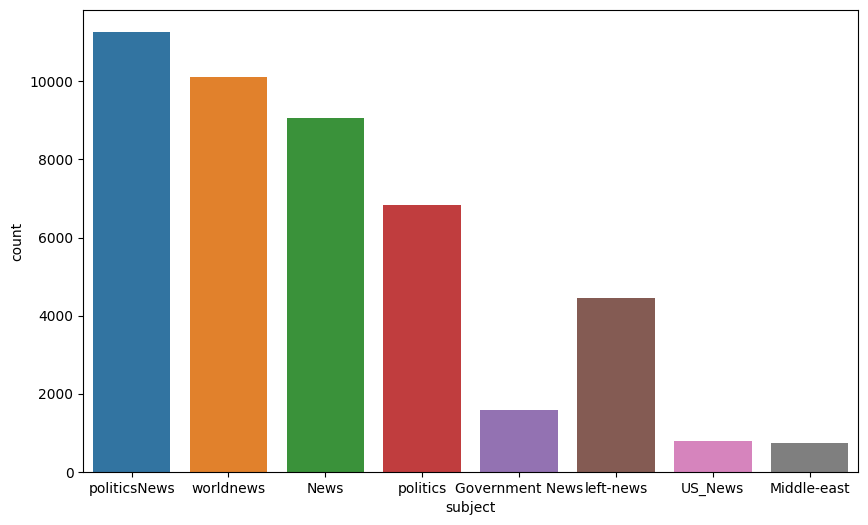

In [ ]:
news_df_pandas = news_df.compute()
plt.figure(figsize=(10, 6))
sns.countplot(x='subject', data=news_df_pandas, hue='subject')
plt.show()

In [ ]:
# Make a copy of the dataframe

In [ ]:
df = news_df.copy()
df = df.repartition(npartitions=30)
nocol = ['title', 'text', 'date', 'subject']
df = df.drop(columns=nocol)
df.head()

,txt,class
0,"As U.S. budget fight looms, Republicans flip t...",1
1,U.S. military to accept transgender recruits o...,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,1
3,FBI Russia probe helped by Australian diplomat...,1
4,Trump wants Postal Service to charge 'much mor...,1


In [ ]:
def clean_text(text):
    result = []
    # tokenize the words
    words = nltk.word_tokenize(text)
    #words = re.sub('[^a-zA-Z]', '', words)
    result = ' '.join([w for w in words if w not in stopWords and len(w) > 2])
    return result


In [ ]:
meta = ('txt', 'object')
df['txt'] = df['txt'].apply(clean_text, meta=meta)

In [ ]:
from dask.diagnostics import ProgressBar
with ProgressBar():
    df_res = df.head(5)
df_res


[########################################] | 100% Completed | 9.08 s


,txt,class
0,U.S. budget fight looms Republicans flip fisca...,1
1,U.S. military accept transgender recruits Mond...,1
2,Senior U.S. Republican senator 'Let Mr. Muelle...,1
3,FBI Russia probe helped Australian diplomat ti...,1
4,Trump wants Postal Service charge 'much Amazon...,1


In [ ]:
df2 = news_df.copy()

**Tokenization**

In [ ]:
# def token(para):
#   sentence = nltk.sent_tokenize(para)
#   words = nltk.word_tokenize(para)
#   return words

In [ ]:
# meta = ('txt', 'object')
# df['txt'] = df['txt'].apply(token, meta=meta)

In [ ]:
df.head(5)

**Stemming**

In [ ]:
stemmer = PorterStemmer()

def stemming(text):
    # Remove punctuations
    translator = str.maketrans('', '', string.punctuation)
    text = text.translate(translator)

    # Replace certain patterns
    text = re.sub(r'\bU\.S\.\b', 'usa', text, flags=re.IGNORECASE)
    # Remove special characters
    text = re.sub(r'[^A-Za-z\s]', '', text)

    # Tokenize the words
    words = word_tokenize(text)
    # Convert each word to lowercase
    words = [stemmer.stem(w) for w in words]
    # Remove stopwords and words with length less than 3
    result = ' '.join([w for w in words if len(w) > 2])

    return result

meta = ('txt', 'object')
df['stem'] = df['txt'].apply(stemming, meta=meta)

from dask.diagnostics import ProgressBar
with ProgressBar():
    res = df.head(5)
res

[########################################] | 100% Completed | 19.08 s


,txt,class,stem
0,U.S. budget fight looms Republicans flip fisca...,1,budget fight loom republican flip fiscal scrip...
1,U.S. military accept transgender recruits Mond...,1,militari accept transgend recruit monday penta...
2,Senior U.S. Republican senator 'Let Mr. Muelle...,1,senior republican senat let mueller job washin...
3,FBI Russia probe helped Australian diplomat ti...,1,fbi russia probe help australian diplomat tipo...
4,Trump wants Postal Service charge 'much Amazon...,1,trump want postal servic charg much amazon shi...


**Lemmatization**

In [ ]:
from nltk.tokenize.treebank import TreebankWordDetokenizer
lemmatizer = WordNetLemmatizer()
def lemmatize(text):
    # Tokenize the words
    words = nltk.word_tokenize(text)
    # Lemmatize each word
    lemmatized_words = [lemmatizer.lemmatize(w) for w in words]
    # Detokenize the lemmatized words
    result = TreebankWordDetokenizer().detokenize(lemmatized_words)
    return result

meta = ('txt', 'object')
df['lemmatized'] = df['stem'].apply(lemmatize, meta=meta)

from dask.diagnostics import ProgressBar
with ProgressBar():
    res = df.head(5)
res


[########################################] | 100% Completed | 33.61 s


,txt,class,stem,lemmatized
0,U.S. budget fight looms Republicans flip fisca...,1,budget fight loom republican flip fiscal scrip...,budget fight loom republican flip fiscal scrip...
1,U.S. military accept transgender recruits Mond...,1,militari accept transgend recruit monday penta...,militari accept transgend recruit monday penta...
2,Senior U.S. Republican senator 'Let Mr. Muelle...,1,senior republican senat let mueller job washin...,senior republican senat let mueller job washin...
3,FBI Russia probe helped Australian diplomat ti...,1,fbi russia probe help australian diplomat tipo...,fbi russia probe help australian diplomat tipo...
4,Trump wants Postal Service charge 'much Amazon...,1,trump want postal servic charg much amazon shi...,trump want postal servic charg much amazon shi...


Converting words to vectors=> Word2Vec used here as they store semantic information

In [ ]:
final_df = df.copy()
cols=['txt', 'stem']
final_df = final_df.drop(columns = cols)
final_df= final_df.rename(columns={'lemmatized': 'news'})
final_df.head()

,class,news
0,1,budget fight loom republican flip fiscal scrip...
1,1,militari accept transgend recruit monday penta...
2,1,senior republican senat let mueller job washin...
3,1,fbi russia probe help australian diplomat tipo...
4,1,trump want postal servic charg much amazon shi...


In [ ]:
order = ['news', 'class']
final_df = final_df[order]
final_df.head()

,news,class
0,budget fight loom republican flip fiscal scrip...,1
1,militari accept transgend recruit monday penta...,1
2,senior republican senat let mueller job washin...,1
3,fbi russia probe help australian diplomat tipo...,1
4,trump want postal servic charg much amazon shi...,1


In [ ]:
# Specify the file path within your Google Drive
csv_file_path = '/content/drive/MyDrive/preNews.csv'

# Save the Dask DataFrame to a CSV file
with ProgressBar():
  final_df.to_csv(csv_file_path, index=False, single_file=True)

[########################################] | 100% Completed | 12m 7s


**Alternative: Storing in S3 Bucket**

In [ ]:
!pip install boto3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 25.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.2/82.2 kB 10.2 MB/s eta 0:00:00


In [ ]:
import boto3
s3 = boto3.client('s3', aws_access_key_id='<your access-key>', aws_secret_access_key='<secret key>')

In [ ]:
final_df.to_csv('data.csv', index=False)

['/content/data.csv/00.part',
 '/content/data.csv/01.part',
 '/content/data.csv/02.part',
 '/content/data.csv/03.part',
 '/content/data.csv/04.part',
 '/content/data.csv/05.part',
 '/content/data.csv/06.part',
 '/content/data.csv/07.part',
 '/content/data.csv/08.part',
 '/content/data.csv/09.part',
 '/content/data.csv/10.part',
 '/content/data.csv/11.part',
 '/content/data.csv/12.part',
 '/content/data.csv/13.part',
 '/content/data.csv/14.part',
 '/content/data.csv/15.part',
 '/content/data.csv/16.part',
 '/content/data.csv/17.part',
 '/content/data.csv/18.part',
 '/content/data.csv/19.part',
 '/content/data.csv/20.part',
 '/content/data.csv/21.part',
 '/content/data.csv/22.part',
 '/content/data.csv/23.part',
 '/content/data.csv/24.part',
 '/content/data.csv/25.part',
 '/content/data.csv/26.part',
 '/content/data.csv/27.part',
 '/content/data.csv/28.part',
 '/content/data.csv/29.part']

In [ ]:
file_path = '/content/drive/MyDrive/preNews.csv'

In [ ]:
# Upload the file to S3
file_key = 'preNews.csv'
bucket_name = 'mansiawsdata'
s3.upload_file(file_path, bucket_name, file_key)
